# Análisis exploratorio del conjunto de datos de poesía

In [ ]:

from datasets import DatasetDict, concatenate_datasets
from collections import Counter
import nltk
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
from collections import Counter
from datasets import load_dataset
import pandas as pd

In [ ]:
from datasets import load_dataset

# Cargar el conjunto de datos
dataset = load_dataset("linhd-postdata/poesias")

# Acceder a la información del conjunto de datos
print(dataset)

In [ ]:
train_data = dataset['train']

# Imprimir el primer ejemplo en la división de entrenamiento
primer_poema = train_data[0]
print(primer_poema)

{'author': 'Pombo,Rafael', 'century': '<XXI', 'title': 'Ayacucho', 'text': '¡Ay! me hieren la vista los aceros;\n¿Quién osa desafiarlos frente a frente,\nSi esa es la flor de Iberia que valiente\nNegó tributo a los franceses fieros?\nMas... mirad unos jóvenes guerreros\nDe cuyo pecho se apodera ardiente\nEl ansia de ver libre, independiente,\nSu Patria, de sicarios extranjeros.\n¡Ah! ya los veis lanzarse impetuosos...\nEmbestir a los viejos veteranos\n¡Tintos en sangre alzarse victoriosos!\n«¡Triunfo y perdón!» escuchan los tiranos,\nY gritan a los héroes generosos:\n«¡Libres sois para siempre, americanos!»', 'language': 'es'}


In [ ]:
merged_dataset_tot = DatasetDict({
    'merged': concatenate_datasets([dataset['train'], dataset['test']])
})

In [ ]:
import pandas as pd

data = merged_dataset_tot["merged"].to_dict()

# Crear un DataFrame de pandas
df = pd.DataFrame(data)

# Mostrar las primeras filas del DataFrame
df.head()

,author,century,title,text,language
0,"Pombo,Rafael",<XXI,Ayacucho,¡Ay! me hieren la vista los aceros;\n¿Quién os...,es
1,"Machado,Antonio",<XXI,¡Oh_Tarde_Luminosa!,¡Oh tarde luminosa!\nEl aire está encantado.\n...,es
2,"Pizarnik,Alejandra",<XXI,Se_Fuga_La_Isla,Se fuga la isla\nY la muchacha vuelve a escala...,es
3,"Bolaño,Roberto",<XXI,Devoción_De_Roberto_Bolaño,A finales de 1992 él estaba muy enfermo\nY se ...,es
4,"Pardo_García,Germán",<XXI,Valles_Que_Amé:_Frugal_Harinería,Valles que amé: frugal harinería\ndel frumenta...,es


In [ ]:
df['author'].value_counts()

author
Pombo,Rafael            533
Fuertes,Gloria          488
Flórez,Julio            486
García_Cabrera,Pedro    478
Neruda,Pablo            444
                       ... 
Nanni_Arias,Catriel       1
Gómez,Jorge               1
Guido                     1
Velarde,José              1
Luna,Miguel               1
Name: count, Length: 859, dtype: int64

In [ ]:
df['century'].value_counts()

century
<XXI    20999
XXI      4301
Name: count, dtype: int64

In [ ]:
df['language'].value_counts()

language
es    25273
gl       20
it        4
fr        2
en        1
Name: count, dtype: int64

In [ ]:
dataset_es = dataset.filter(lambda example: example['language'] == 'es')

Filter:   0%|          | 0/22770 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2530 [00:00<?, ? examples/s]

In [ ]:
merged_dataset_es = DatasetDict({
    'merged': concatenate_datasets([dataset_es['train'], dataset_es['test']])
})

In [ ]:
all_texts = merged_dataset_es['merged']['text']

In [ ]:
words = []
for text in all_texts:
    words.extend(text.split())
word_counts = Counter(words)

In [ ]:
words

In [ ]:
len(words)

7961293

In [ ]:
word_counts

In [ ]:
len(word_counts)

298041

In [ ]:
vocab = list(word_counts.keys())
vocab_size = len(vocab)

In [ ]:
vocab_size

298041

In [ ]:
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

In [ ]:
sorted_word_counts

[('de', 361484),
 ('la', 263385),
 ('y', 239478),
 ('el', 221589),
 ('que', 214381),
 ('en', 187846),
 ('a', 121071),
 ('los', 99612),
 ('las', 80425),
 ('un', 79354),
 ('del', 74739),
 ('se', 72598),
 ('su', 69596),
 ('con', 66132),
 ('no', 63749),
 ('al', 55203),
 ('por', 53612),
 ('mi', 53116),
 ('Y', 49648),
 ('tu', 47635),
 ('es', 46061),
 ('una', 44109),
 ('me', 41256),
 ('como', 38535),
 ('lo', 35687),
 ('sus', 30041),
 ('te', 29727),
 ('más', 27431),
 ('para', 25685),
 ('sin', 25608),
 ('El', 22747),
 ('La', 22647),
 ('Que', 19521),
 ('De', 19117),
 ('le', 19059),
 ('si', 18733),
 ('tus', 18043),
 ('En', 18002),
 ('mis', 17789),
 ('ya', 16206),
 ('o', 15733),
 ('ni', 15604),
 ('yo', 13775),
 ('cuando', 13750),
 ('No', 13669),
 ('sobre', 13531),
 ('tan', 13447),
 ('entre', 13193),
 ('amor', 12592),
 ('ha', 12070),
 ('todo', 11311),
 ('nos', 11278),
 ('ojos', 11186),
 ('vida', 10831),
 ('donde', 10796),
 ('A', 10345),
 ('ser', 10267),
 ('Con', 9780),
 ('qué', 9754),
 ('alma', 925

In [ ]:
import nltk
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
from collections import Counter
import spacy

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
stop_words = nltk.corpus.stopwords.words('spanish')
stop_words.extend(["si"])

In [ ]:
# texto_sin_stopwords = [palabra for palabra in texto.split() if palabra not in stop_words]

palabra = 'el'

if palabra in stop_words:
    print(f'{palabra} es una stopword en español.')
else:
    print(f'{palabra} no es una stopword en español.')

el es una stopword en español.


In [ ]:
all_texts

In [ ]:
texto_limpio = [' '.join([palabra.lower() for palabra in re.findall(r'\b\w+\b', texto) if palabra.lower() not in stop_words]) for texto in all_texts]


In [ ]:
tokens = nltk.word_tokenize(' '.join(texto_limpio))

In [ ]:
type(tokens)

list

In [ ]:
len(tokens)

4140960

In [ ]:
word_counts2 = Counter(tokens)

In [ ]:
len(word_counts2)

126473

In [ ]:
sorted_word_counts2 = sorted(word_counts2.items(), key=lambda x: x[1], reverse=True)

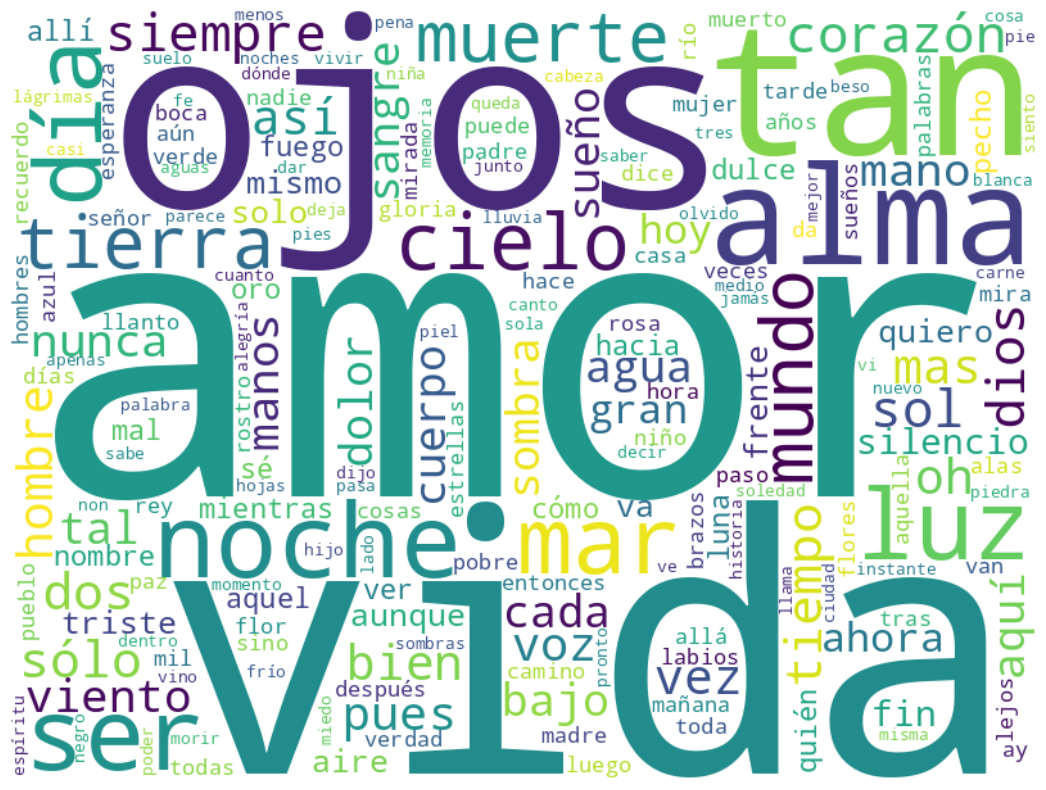

In [ ]:
wordc = WordCloud(width=800, height=600, background_color='white', normalize_plurals=False, collocations=False).generate(' '.join(tokens))
plt.figure(figsize=(20,10))
plt.imshow(wordc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
dataset_es = dataset.filter(lambda example: example['language'] == 'es')

Filter:   0%|          | 0/22770 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2530 [00:00<?, ? examples/s]

In [ ]:
merged_dataset_es = DatasetDict({
    'merged': concatenate_datasets([dataset_es['train'], dataset_es['test']])
})

In [ ]:
all_texts = merged_dataset_es['merged']['text']

In [ ]:
all_texts[0]

'¡Ay! me hieren la vista los aceros;\n¿Quién osa desafiarlos frente a frente,\nSi esa es la flor de Iberia que valiente\nNegó tributo a los franceses fieros?\nMas... mirad unos jóvenes guerreros\nDe cuyo pecho se apodera ardiente\nEl ansia de ver libre, independiente,\nSu Patria, de sicarios extranjeros.\n¡Ah! ya los veis lanzarse impetuosos...\nEmbestir a los viejos veteranos\n¡Tintos en sangre alzarse victoriosos!\n«¡Triunfo y perdón!» escuchan los tiranos,\nY gritan a los héroes generosos:\n«¡Libres sois para siempre, americanos!»'

In [ ]:
len(all_texts)

25273

In [ ]:
texto_limpio3 = [' '.join([palabra.lower() for palabra in re.findall(r'\b\w+\b', texto)]) for texto in all_texts]

In [ ]:
all_texts_sin_n = [frase.replace('\n', ' ') for frase in all_texts]

In [ ]:
all_texts_sin_n[0].split()

['¡Ay!',
 'me',
 'hieren',
 'la',
 'vista',
 'los',
 'aceros;',
 '¿Quién',
 'osa',
 'desafiarlos',
 'frente',
 'a',
 'frente,',
 'Si',
 'esa',
 'es',
 'la',
 'flor',
 'de',
 'Iberia',
 'que',
 'valiente',
 'Negó',
 'tributo',
 'a',
 'los',
 'franceses',
 'fieros?',
 'Mas...',
 'mirad',
 'unos',
 'jóvenes',
 'guerreros',
 'De',
 'cuyo',
 'pecho',
 'se',
 'apodera',
 'ardiente',
 'El',
 'ansia',
 'de',
 'ver',
 'libre,',
 'independiente,',
 'Su',
 'Patria,',
 'de',
 'sicarios',
 'extranjeros.',
 '¡Ah!',
 'ya',
 'los',
 'veis',
 'lanzarse',
 'impetuosos...',
 'Embestir',
 'a',
 'los',
 'viejos',
 'veteranos',
 '¡Tintos',
 'en',
 'sangre',
 'alzarse',
 'victoriosos!',
 '«¡Triunfo',
 'y',
 'perdón!»',
 'escuchan',
 'los',
 'tiranos,',
 'Y',
 'gritan',
 'a',
 'los',
 'héroes',
 'generosos:',
 '«¡Libres',
 'sois',
 'para',
 'siempre,',
 'americanos!»']

In [ ]:

def quitar_puntuacion(texto):
    # Patrón de expresión regular para encontrar signos de puntuación
    patron = r'[^\w\s]'  # Coincidir con cualquier carácter que no sea alfanumérico ni espacio

    # Usar expresión regular para reemplazar signos de puntuación con una cadena vacía
    texto_sin_puntuacion = re.sub(patron, '', texto)
    return texto_sin_puntuacion

def quitar_puntuacion_lista(lista_textos):
    textos_sin_puntuacion = []
    for texto in lista_textos:
        texto_sin_puntuacion = quitar_puntuacion(texto)
        textos_sin_puntuacion.append(texto_sin_puntuacion)
    return textos_sin_puntuacion

In [ ]:
textos_sin_puntuacion = quitar_puntuacion_lista(all_texts_sin_n)

In [ ]:
len(textos_sin_puntuacion[0].split())

83

In [ ]:
texton = []
lentext = []

for t in textos_sin_puntuacion:
  ptokens = t.split()
  uni = ' '.join(ptokens)
  lt = len(ptokens)
  texton.append(uni)
  lentext.append(lt)

In [ ]:
lentext[0]

83

In [ ]:
datatextos = {
    'Texto': texton,
    'Longitud': lentext
}

# Crear el DataFrame
df_textos = pd.DataFrame(datatextos)

In [ ]:
df_textos

,Texto,Longitud
0,Ay me hieren la vista los aceros Quién osa des...,83
1,Oh tarde luminosa El aire está encantado La bl...,68
2,Se fuga la isla Y la muchacha vuelve a escalar...,70
3,A finales de 1992 él estaba muy enfermo Y se h...,161
4,Valles que amé frugal harinería del frumentari...,80
...,...,...
25268,Hubierais visto llorar a las yedras cuando el ...,151
25269,El árbol sabe con sus raíces y sus ramas todo ...,180
25270,Profeta de mis fines no dudaba del mundo que p...,76
25271,Las ruinas solamente quedaban del santuario Y ...,180


In [ ]:
df_textos.describe()

,Longitud
count,25273.000000
mean,314.527124
std,2126.253338
min,4.000000
25%,79.000000
50%,116.000000
75%,237.000000
max,246506.000000


In [ ]:
df_textos[df_textos.Longitud >= 1000].count()

Texto       1032
Longitud    1032
dtype: int64

In [ ]:
len(textos_sin_puntuacion[17664].split())

246506

In [ ]:
df_textos.sort_values(by = 'Longitud', ascending = False).head(80).count()

Texto       80
Longitud    80
dtype: int64

In [ ]:
# Definir los intervalos y las etiquetas para las categorías
bins = [0, 50, 100, 500, 1000, 2000, 5000, 10000, 50000, float('inf')]
labels = ['<=50', '51-100', '101-500','501-1000', '1001-2000', '2001-5000', '5001-10000','10001-50000','>50000']

In [ ]:
# Agregar la columna de categorías
df_textos['Categoria'] = pd.cut(df_textos['Longitud'], bins=bins, labels=labels, right=False)

In [ ]:
df_textos.head(5)

,Texto,Longitud,Categoria
0,Ay me hieren la vista los aceros Quién osa des...,83,51-100
1,Oh tarde luminosa El aire está encantado La bl...,68,51-100
2,Se fuga la isla Y la muchacha vuelve a escalar...,70,51-100
3,A finales de 1992 él estaba muy enfermo Y se h...,161,101-500
4,Valles que amé frugal harinería del frumentari...,80,51-100


In [ ]:
df_textos.groupby('Categoria').size()

Categoria
<=50            3195
51-100          7414
101-500        12073
501-1000        1559
1001-2000        630
2001-5000        280
5001-10000        71
10001-50000       44
>50000             7
dtype: int64